## Dataset Columns Description
1. `mpg`: miles per galon of fuel (continuous variable).
2. `cylinders`: number of engine cylinders (multi-valued discrete variable).
3. `displacement`: (continuous variable)
4. `horsepower`: the power produced by engine to move the car (continuous variable)
5. `weight`: car weight (continuous variable)
6. `acceleration`: the acceleration an engine can get per second (continuous variable)
7. `model year`: car release year from 1970 to 1982(multi-valued discrete variable)
8. `origin`: car manufacturing place (1 -> USA, 2 -> Europe, 3 -> Asia) (multi-valued discrete variable)
9. `car name`: car model name (unique for each instance)
---

In [111]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score, mean_absolute_error

In [49]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv('/kaggle/input/autompg-dataset/auto-mpg.csv')

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## **1.Data Exploring**

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [51]:
df.shape


(398, 9)

In [52]:
df.duplicated().sum()

0

In [53]:
# plt.plot(df['mpg'])
# plt.plot(df['cylinders'])

In [54]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [55]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [56]:
(df['horsepower'] == '?').sum()

6

### **Exploring Summary**
- Our dataset has a total of 398 records and 9 columns.
- We have no NaNs in our dataset nor duplicated rows.
- `horsepower` column has inconsistant data type. It needs to be handled and casted to `int` data type.
- `origin` would need to be parsed and casted into a categorical datatype.
<!-- - No columns would need to be dropped. -->

## **2.Data Cleaning**

### **Cleaning `horsepower` column**
We will drop each row that contains a `?` on the `horsepower` column.

In [57]:
missing_val = df.isin(['?']).sum()
missing_val

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [58]:
rows_to_drop = df.isin(['?']).any(axis=1)
df_with_missing = df[rows_to_drop]
df_with_missing

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [59]:
df.drop(df_with_missing.index, inplace=True)

missing_val = df.isin(['?']).sum()
missing_val

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [60]:
df['horsepower'] = df['horsepower'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


### **Handling `origin` column**
We will map the `origin` column to the provided description (1-> USA, 2-> Europe, 3-> Asia), and cast its datatype as `category`.

In [61]:
df.loc[df.origin == 1, 'origin'] = 'USA'
df.loc[df.origin == 2, 'origin'] = 'Europe'
df.loc[df.origin == 3, 'origin'] = 'Asia'

df['origin'] = df['origin'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    int64   
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    int64   
 4   weight        392 non-null    int64   
 5   acceleration  392 non-null    float64 
 6   model year    392 non-null    int64   
 7   origin        392 non-null    category
 8   car name      392 non-null    object  
dtypes: category(1), float64(3), int64(4), object(1)
memory usage: 28.1+ KB


## **3.Data Preparation**

In [62]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


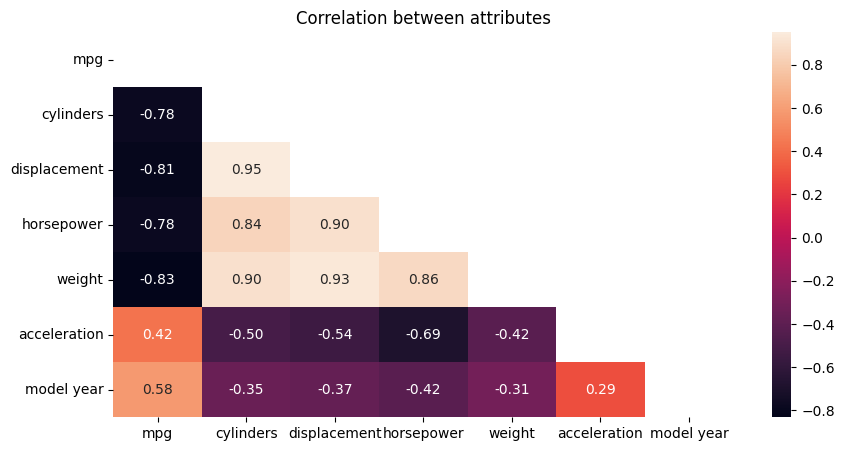

In [63]:
# plotting correlation heatmap
plt.figure(figsize=(10,5))
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
mask = np.triu(corr)
sns.heatmap(corr, annot = True, mask = mask, fmt = '.2f')
plt.title("Correlation between attributes")
plt.show()

**Closer look into the `model year` distribution**

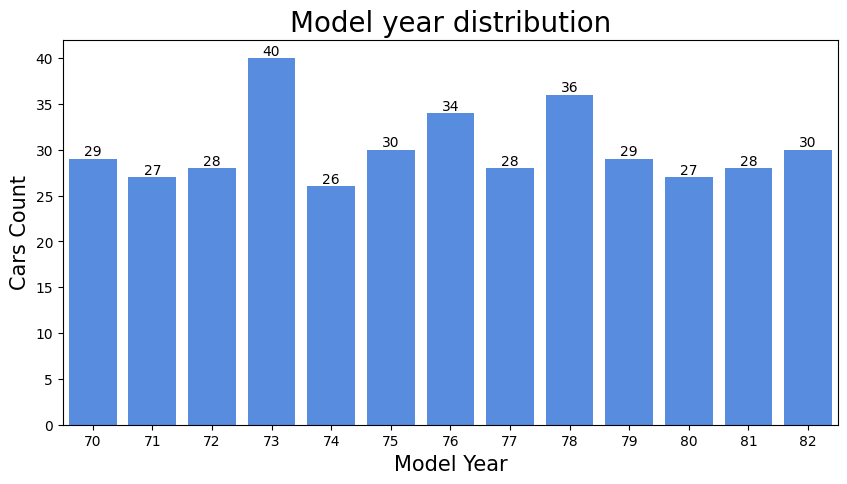

In [64]:
# display the histogram of the `model year` column
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'model year', data = df, color = '#4287f5')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("Model year distribution", fontsize = 20)
plt.xlabel("Model Year", fontsize = 15)
plt.ylabel("Cars Count", fontsize = 15)
plt.show()

<Axes: title={'center': 'Model year against MPG'}, xlabel='Model Year', ylabel='MPG'>

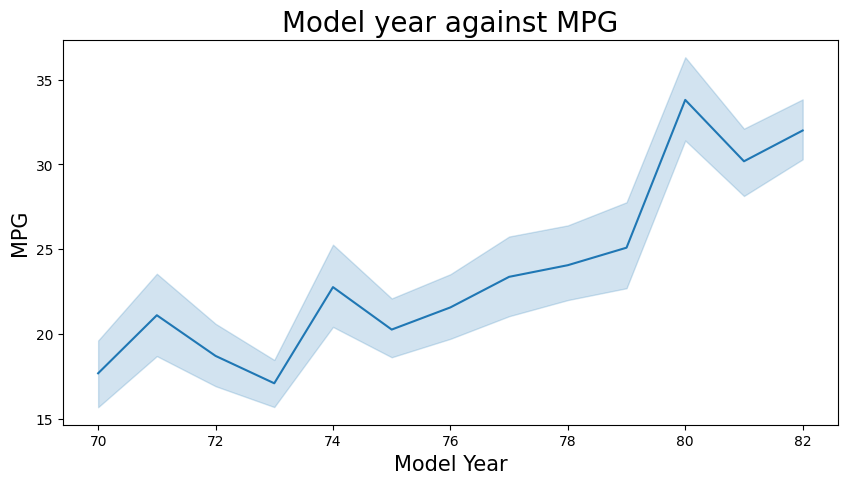

In [65]:
# plot model year against mpg
plt.figure(figsize=(10,5))
plt.title("Model year against MPG", fontsize = 20)
plt.xlabel("Model Year", fontsize = 15)
plt.ylabel("MPG", fontsize = 15)
sns.lineplot(x = 'model year', y = 'mpg', data = df)

- Our dataset contains info about cars from 1970 to 1982.
- Most of the cars are produced in `1973`.
- As years pass after `1973`, there has been a noticable increase in `mpg`.

**Closer look at `mpg` column**

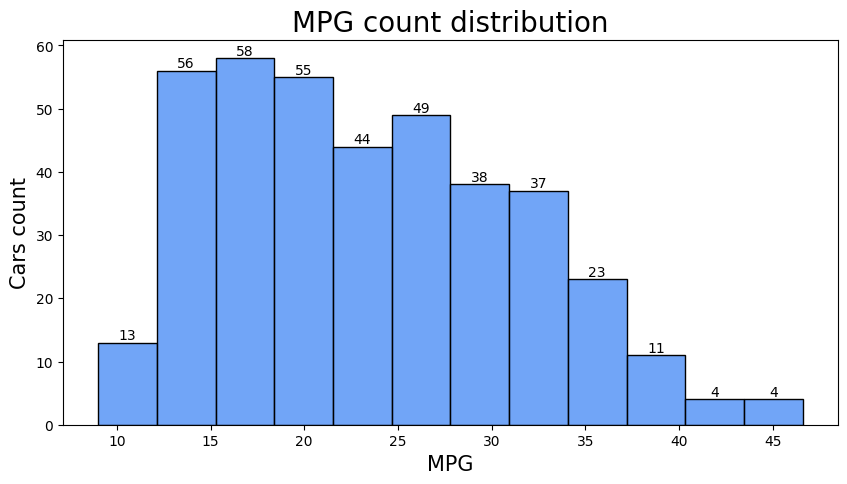

In [66]:
# plot mpg count distibution
plt.figure(figsize=(10,5))
ax = sns.histplot(x = 'mpg', data = df, color = '#4287f5')
ax.bar_label(ax.containers[0], label_type = 'edge')
plt.title("MPG count distribution", fontsize = 20)
plt.xlabel("MPG", fontsize = 15)
plt.ylabel("Cars count", fontsize = 15)
plt.show()

Most of the cars in our dataset have mpg between 15 to 20. Our data is also skewed to the right.

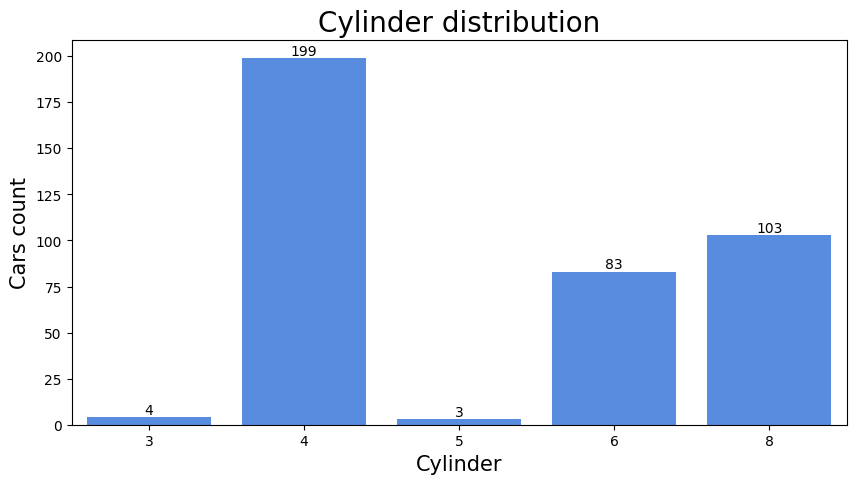

In [67]:
# display cylinder column distribution
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'cylinders', data = df, color = '#4287f5')
ax.bar_label(ax.containers[0], label_type = 'edge')
plt.title("Cylinder distribution", fontsize = 20)
plt.xlabel("Cylinder", fontsize = 15)
plt.ylabel("Cars count", fontsize = 15)
plt.show()

Most cars have `4` cylinder engines.

<Axes: title={'center': 'Cylinders against MPG'}, xlabel='Cylinders', ylabel='MPG'>

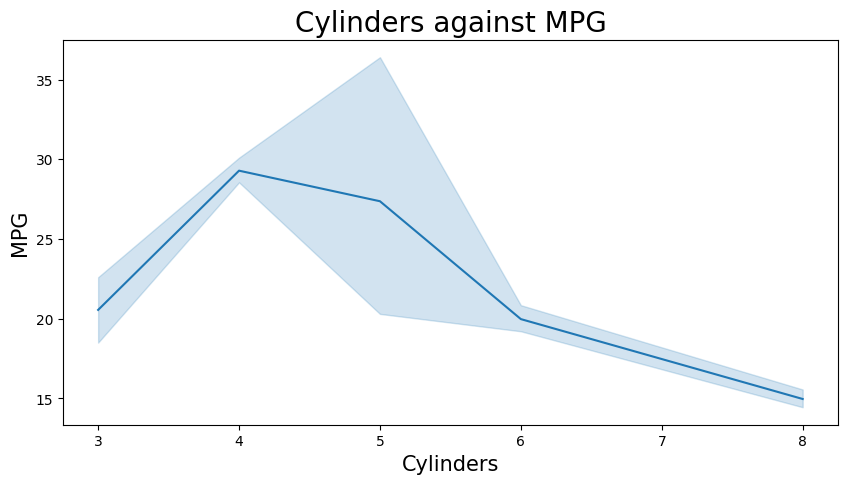

In [68]:
# plot model year against mpg
plt.figure(figsize=(10,5))
plt.title("Cylinders against MPG", fontsize = 20)
plt.xlabel("Cylinders", fontsize = 15)
plt.ylabel("MPG", fontsize = 15)
sns.lineplot(x = 'cylinders', y = 'mpg', data = df)

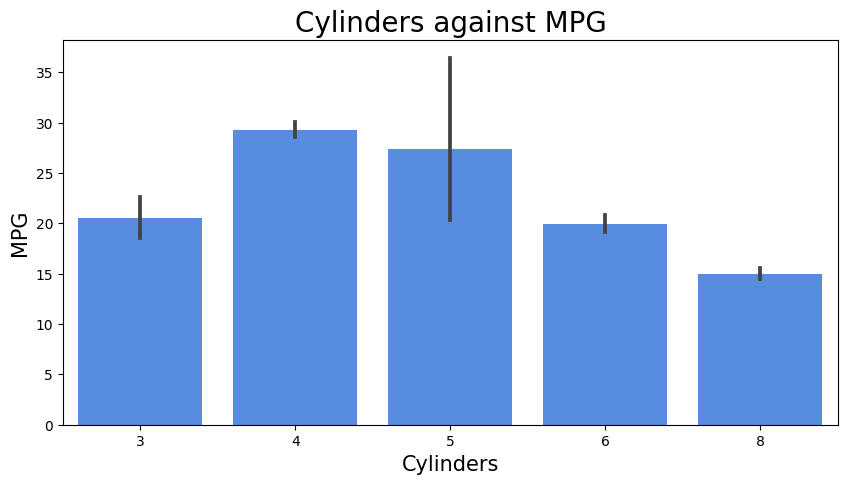

In [69]:
# plot cylinders against mpg
plt.figure(figsize=(10,5))
sns.barplot(x = 'cylinders', y = 'mpg', data = df, color = '#4287f5')
plt.title("Cylinders against MPG", fontsize = 20)
plt.xlabel("Cylinders", fontsize = 15)
plt.ylabel('MPG', fontsize = 15)
plt.show()

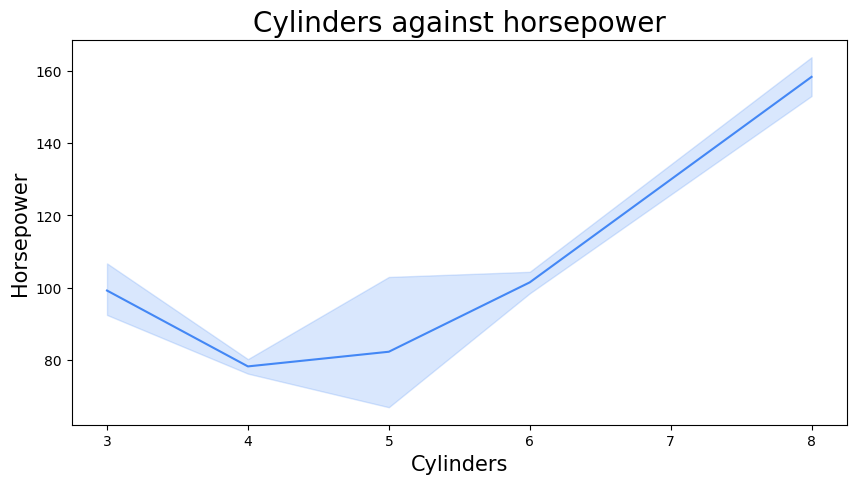

In [70]:
# plot cylinders against horsepower
plt.figure(figsize=(10,5))
sns.lineplot(x = 'cylinders', y = 'horsepower', data = df, color = '#4387f5')
plt.title("Cylinders against horsepower", fontsize = 20)
plt.xlabel("Cylinders", fontsize = 15)
plt.ylabel("Horsepower", fontsize = 15)
plt.show()

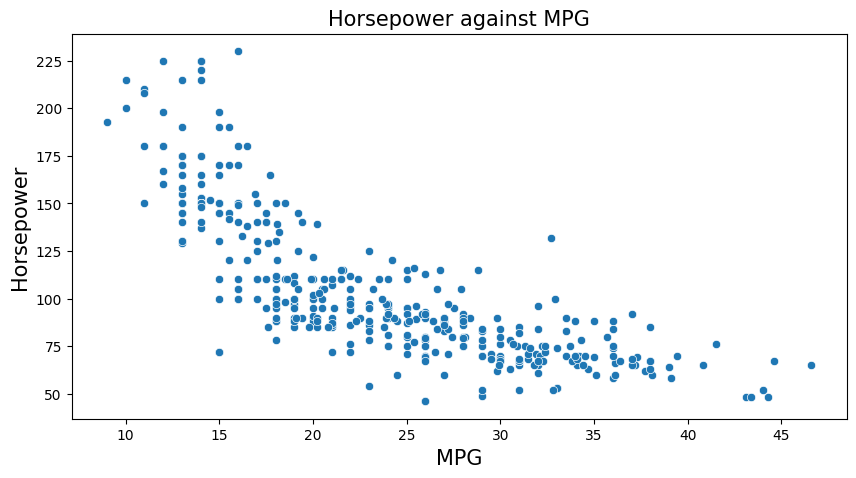

In [71]:
# plot mpg against horsepower
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'mpg', y = 'horsepower', data = df)
plt.title("Horsepower against MPG", fontsize = 15)
plt.xlabel("MPG", fontsize = 15)
plt.ylabel("Horsepower", fontsize = 15)
plt.show()

- As `cylinders` in the engine increases above 4, `MPG` decreases.
- As `cylinders` in the engine increases above 4, engine `horsepower` increases.
- there is negative correlation between `mpg` and `horsepower`.

**Exploring `origin` column and find insights about each manufacturing country.**

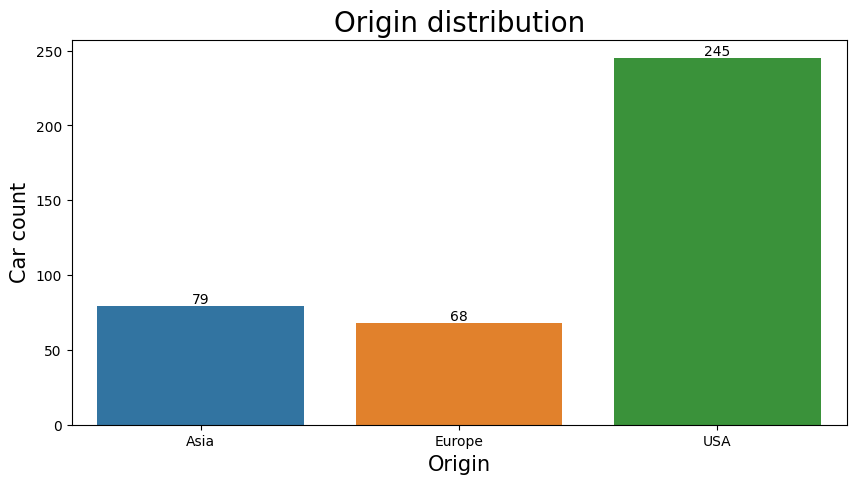

In [72]:
# plot cars origin distribution
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'origin', data = df)
ax.bar_label(ax.containers[0], label_type = 'edge')
plt.title("Origin distribution", fontsize = 20)
plt.xlabel("Origin", fontsize = 15)
plt.ylabel("Car count", fontsize = 15)
plt.show()

We can see that `USA` alone produces more than 64% of the total cars in our dataset.

Let's explore origin relations between other columns.

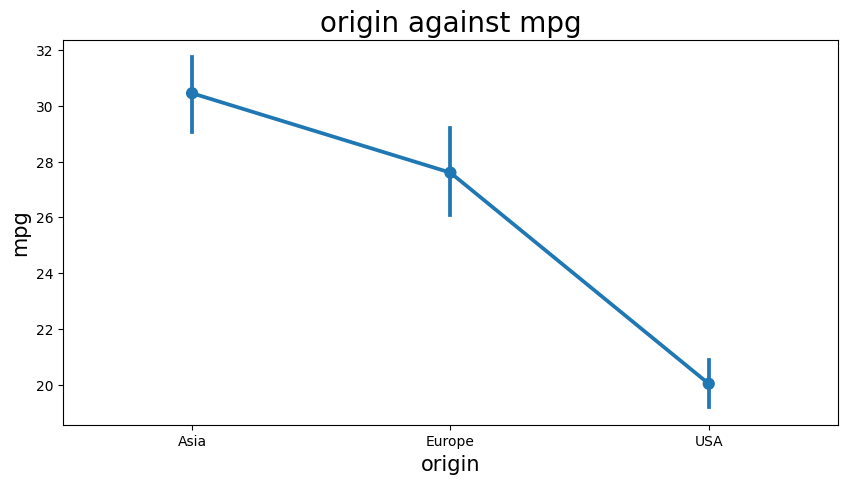

In [73]:
# ploting origin anainst mpg
plt.figure(figsize=(10,5))
sns.pointplot(x = 'origin', y = 'mpg', data = df)
plt.title("origin against mpg", fontsize = 20)
plt.xlabel("origin", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
plt.show()

Althogh `USA` has the biggest count of our dataset, it produces cars with relatively very low `mpg` compared to `Asia` and `Europe`
`Asia` is the leading contry in producing cars with high `mpg` with a mean close to 30.

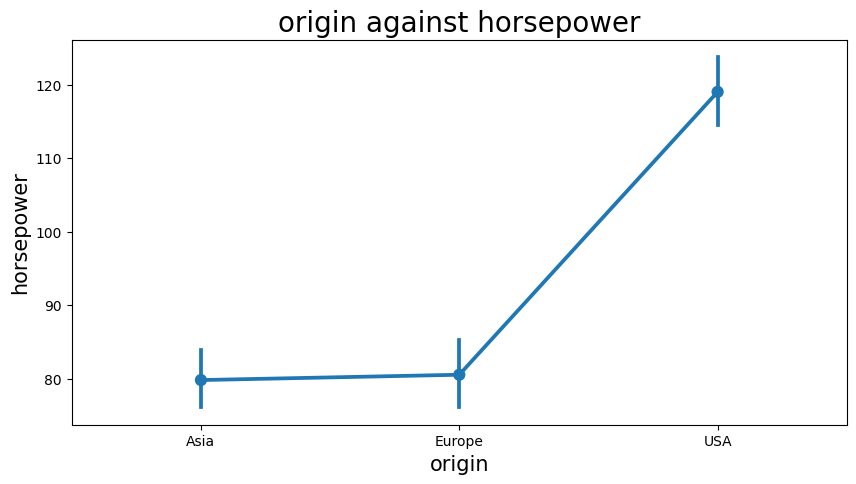

In [74]:
# ploting origin anainst horsepower
plt.figure(figsize=(10,5))
sns.pointplot(x = 'origin', y = 'horsepower', data = df)
plt.title("origin against horsepower", fontsize = 20)
plt.xlabel("origin", fontsize = 15)
plt.ylabel("horsepower", fontsize = 15)
plt.show()

As expected, `USA` has the highest engine `horsepower`. This implies the previously observed conclusion that `hoursepower` and `mpg` has a negative correlation.

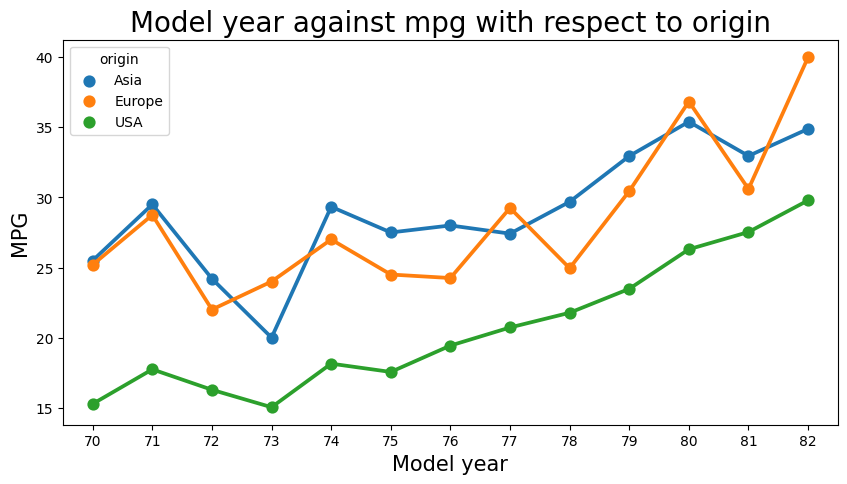

In [75]:
# display model year against mpg with respect to origin
plt.figure(figsize=(10,5))
sns.pointplot(x = 'model year', y = 'mpg', hue = 'origin', data = df, errorbar=None);
plt.title("Model year against mpg with respect to origin", fontsize = 20)
plt.xlabel("Model year", fontsize = 15)
plt.ylabel("MPG", fontsize = 15)
plt.show()

This chart also implies the positive correlation between `model year` and `mpg`, and shows that `Asia` has been leading country in this industry, followed by `Europe` and `USA` comes in the last place.

Let's now explore how `weight` has been affecting our car specs over the years.

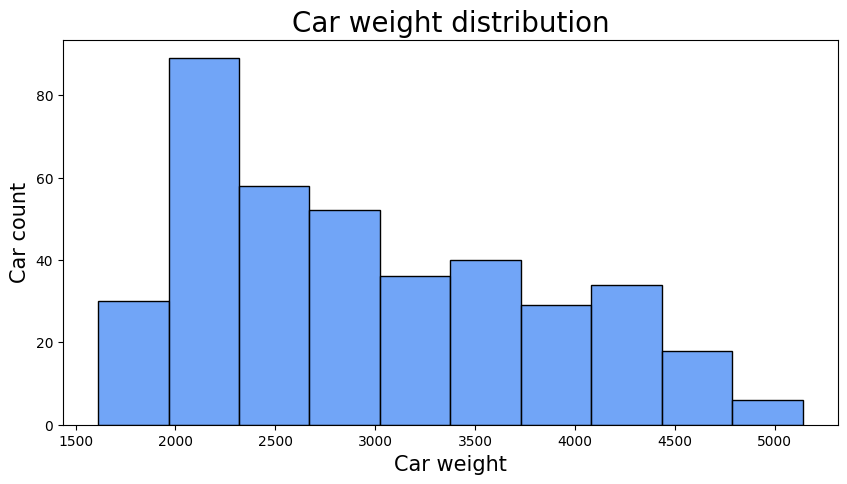

In [76]:
# plot car weight distribution
plt.figure(figsize=(10,5))
sns.histplot(x='weight', data=df, color='#4287f5')
plt.title("Car weight distribution", fontsize=20)
plt.xlabel("Car weight", fontsize=15)
plt.ylabel("Car count", fontsize=15)
plt.show()

Car `weight` varies from 1500 to 5000, with the majority of cars at 2000.

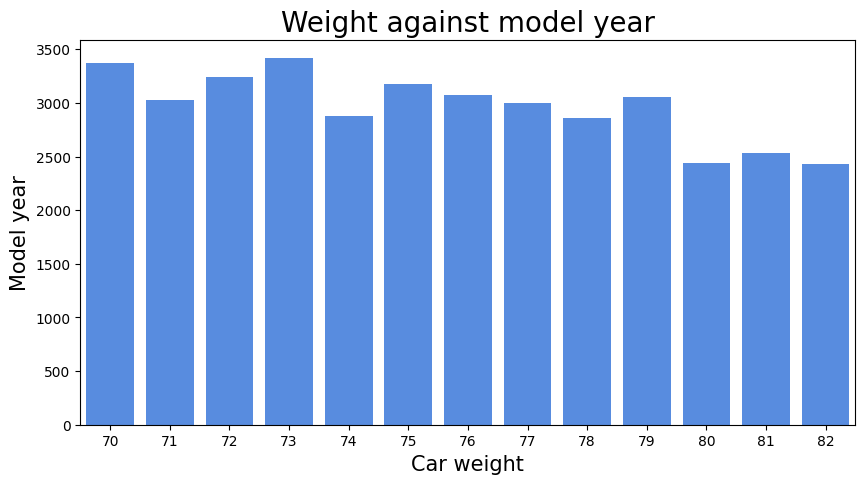

In [77]:
# plot weight against model year
plt.figure(figsize=(10,5))
ax = sns.barplot(x='model year', y='weight', data=df, color='#4287f5', errorbar=None)
plt.title("Weight against model year", fontsize=20)
plt.xlabel("Car weight", fontsize=15)
plt.ylabel("Model year", fontsize=15)
plt.show()

Car `weight` almost  has been decreasing over the years. 

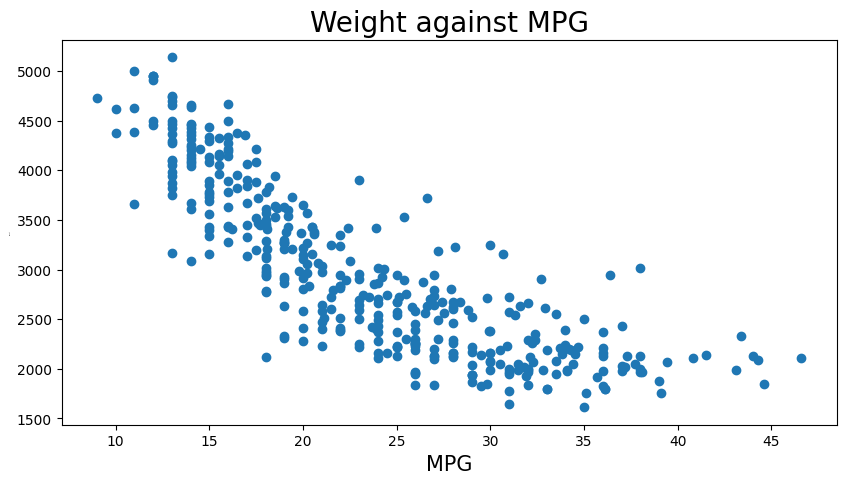

In [78]:
# plot weight against mpg
plt.figure(figsize=(10,5))
plt.scatter(x='mpg', y='weight', data=df)
plt.title("Weight against MPG", fontsize=20)
plt.xlabel("MPG", fontsize=15)
plt.ylabel("Weight", fontsize=1)
plt.show()

`mpg` inceases as `weight` decreses over time, that indecates a stron correlation between them.

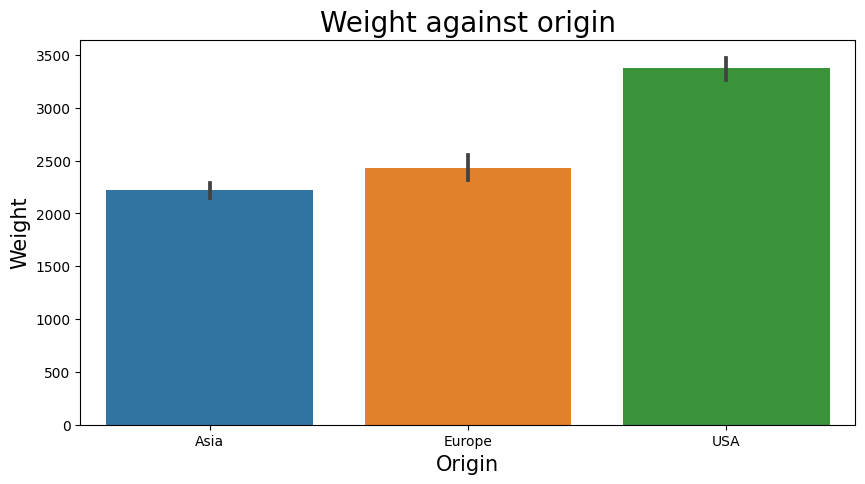

In [79]:
# plot weight against origin
plt.figure(figsize=(10,5))
sns.barplot(x='origin', y='weight', data=df)
plt.title("Weight against origin", fontsize=20)
plt.xlabel("Origin", fontsize=15)
plt.ylabel("Weight", fontsize=15)
plt.show()

As expected, `USA` gets the highest possible `weight` values, that explains alot about its low `mpg` and high `horsepower`.
`Asia` produces the lightest cars campared to `USA` and `Europe`, this also explains itss high `mpg` and low `horsepower`.

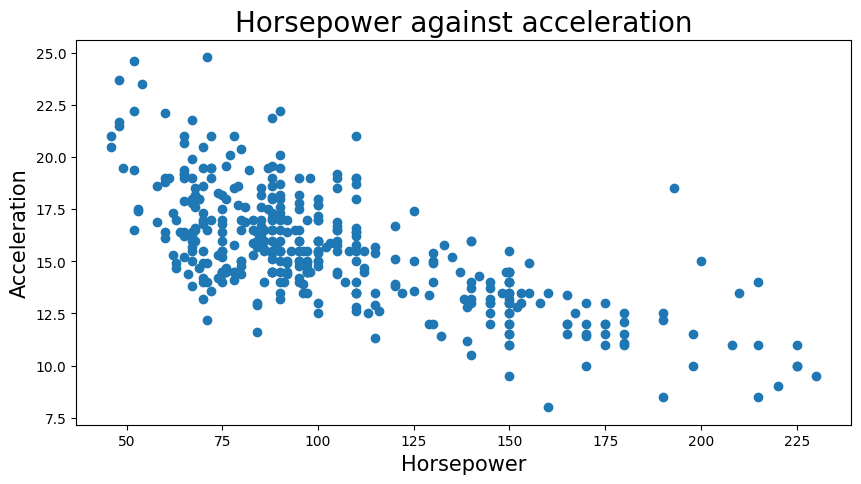

In [80]:
# plot horsepower  against acceleration
plt.figure(figsize=(10,5))
plt.scatter(x='horsepower', y='acceleration', data=df)
plt.title("Horsepower against acceleration", fontsize=20)
plt.xlabel("Horsepower", fontsize=15)
plt.ylabel("Acceleration", fontsize=15)
plt.show()

We can spot a negative correlation between `acceleration` and `horepower`, this means that it has a positive one with `mpg`

## Conclusion

Based on the visualizations, we have drawn the following insights:

1. There has been a noticeable increase in `MPG` (miles per gallon) for cars manufactured after `1973`.
2. As the number of engine `cylinders` increases your, `MPG` decreases while engine `horsepower` increases, indicating a negative correlation between `MPG` and horse`power.
3. Over time, `MPG` has shown a strong positive correlation with decreasing vehicle `weight`.
4. Although the `USA` leads in car production, its cars have relatively low `MPG` and the highest average `weight` compared to those from `Asia` and` Europe`.
5. `Asia` produces the lightest cars with the highest `MPG`, averaging close to `30 MPG`, making it the leader in fuel-efficient vehicles.
6. A negative correlation exists between `acceleration` and `horsepower`, suggesting a positive correlation between `acceleration` and `MPG`.

## **4.Prepare Data For ML Model (prediction)**

**From visualisation there is skewed distribution on `MPG` and `weight` we need to fix it**

* Log Transformation

In [81]:
df['mpg'] = np.log(df['mpg'])

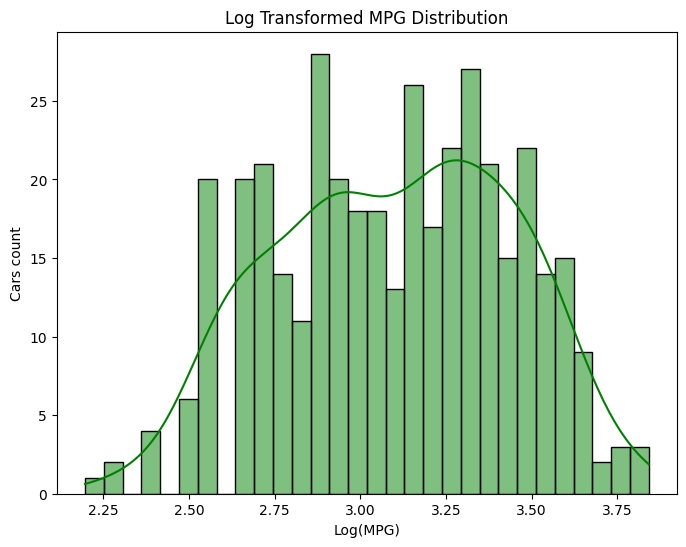

In [82]:
# Log Transformation
plt.figure(figsize=(8, 6))
sns.histplot(df['mpg'], kde=True, bins=30, color='green')
plt.title('Log Transformed MPG Distribution')
plt.xlabel('Log(MPG)')
plt.ylabel('Cars count')
plt.show()

In [83]:
df['weight'] = np.log(df['weight'])

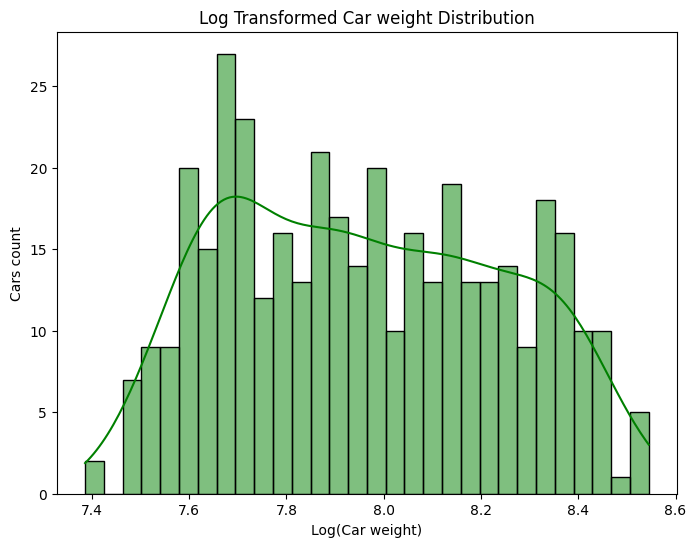

In [84]:
# Log Transformation
plt.figure(figsize=(8, 6))
sns.histplot(df['weight'], kde=True, bins=30, color='green')
plt.title('Log Transformed Car weight Distribution')
plt.xlabel('Log(Car weight)')
plt.ylabel('Cars count')
plt.show()

**As Mentioned in Dataset Description there is 3 multi-valued discrete variable columns (`cylinders` , `model year` ,`origin`) so we need to encode them**

* One-Hot Encoding

In [87]:
one_hot_encoded_cylinders = pd.get_dummies(df['cylinders'], prefix='cyl')
one_hot_encoded_cylinders = one_hot_encoded_cylinders.astype(int)
df = pd.concat([df, one_hot_encoded_cylinders], axis=1)
df.drop('cylinders', axis=1, inplace=True)

In [90]:
one_hot_encoded_modelyear = pd.get_dummies(df['model year'], prefix='model year')
one_hot_encoded_modelyear = one_hot_encoded_modelyear.astype(int)
df = pd.concat([df, one_hot_encoded_modelyear], axis=1)
df.drop('model year', axis=1, inplace=True)

In [93]:
one_hot_encoded_origin = pd.get_dummies(df['origin'], prefix='org')
one_hot_encoded_origin = one_hot_encoded_origin.astype(int)
df = pd.concat([df, one_hot_encoded_origin], axis=1)
df.drop('origin', axis=1, inplace=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            392 non-null    float64
 1   displacement   392 non-null    float64
 2   horsepower     392 non-null    int64  
 3   weight         392 non-null    float64
 4   acceleration   392 non-null    float64
 5   car name       392 non-null    object 
 6   cyl_3          392 non-null    int64  
 7   cyl_4          392 non-null    int64  
 8   cyl_5          392 non-null    int64  
 9   cyl_6          392 non-null    int64  
 10  cyl_8          392 non-null    int64  
 11  model year_70  392 non-null    int64  
 12  model year_71  392 non-null    int64  
 13  model year_72  392 non-null    int64  
 14  model year_73  392 non-null    int64  
 15  model year_74  392 non-null    int64  
 16  model year_75  392 non-null    int64  
 17  model year_76  392 non-null    int64  
 18  model year_77  

**Drop Unnecessary Columns**

In [96]:
df.drop('car name', axis=1, inplace=True)

**Now We Need To Apply Scaling To Continuous Variable**

* MinMaxScaler

In [101]:
columns_to_scale = ['mpg', 'displacement','horsepower','weight','acceleration']

scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

**Split the Data**

In [103]:
X = df.drop(columns=['mpg'])  
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **5.Train Different Models to Predict `MPG`**

In [131]:
linear_reg = LinearRegression()
ada_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=7), n_estimators=10, random_state=42)
rf_model = RandomForestRegressor(n_estimators=10, max_depth=7, random_state=42)
svr_model = SVR()
gb_model = GradientBoostingRegressor(n_estimators=10, random_state=42)
dt_model = DecisionTreeRegressor(random_state=42, max_depth=7)

models = {
    'Linear Regression': linear_reg,
    'AdaBoost': ada_model,
    'Random Forest': rf_model,
    'Support Vector Regressor': svr_model,
    'Gradient Boosting': gb_model,
    'Decision Tree': dt_model
}

errors = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    errors[model_name] = r2 
    print(f"{model_name} R^2 Score: {r2:.2f}")
    print(f"{model_name} Mean Absolute Error: {mae:.2f}\n")

Linear Regression R^2 Score: 0.92
Linear Regression Mean Absolute Error: 0.04

AdaBoost R^2 Score: 0.84
AdaBoost Mean Absolute Error: 0.06

Random Forest R^2 Score: 0.83
Random Forest Mean Absolute Error: 0.06

Support Vector Regressor R^2 Score: 0.85
Support Vector Regressor Mean Absolute Error: 0.06

Gradient Boosting R^2 Score: 0.70
Gradient Boosting Mean Absolute Error: 0.08

Decision Tree R^2 Score: 0.74
Decision Tree Mean Absolute Error: 0.08



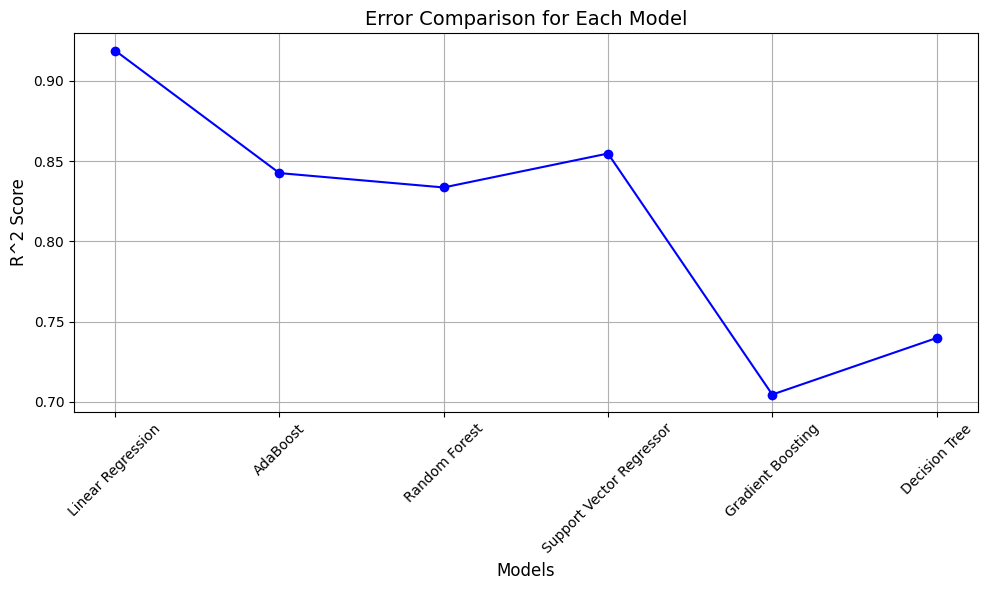

In [123]:
plt.figure(figsize=(10, 6))

model_names = list(errors.keys())
error_values = list(errors.values())

plt.plot(model_names, error_values, marker='o', linestyle='-', color='b')

plt.title('Error Comparison for Each Model', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('R^2 Score', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.grid(True)
plt.show()